## Nested 
Finora, hai lavorato con molti tipi di dati, inclusi tipi numerici (interi, valori a virgola mobile), stringhe e il tipo DATETIME. In questo tutorial imparerai come eseguire query sui **dati nidificati** e **ripetuti**. Questi sono i tipi di dati più complessi che puoi trovare nei set di dati BigQuery!

Considera un ipotetico set di dati contenente informazioni sugli animali domestici e sui loro giocattoli. Potremmo organizzare queste informazioni in due tabelle diverse (una tabella degli animali domestici e una tabella dei giocattoli). La tabella dei giocattoli potrebbe contenere una colonna "Pet_ID" che potrebbe essere utilizzata per abbinare ciascun giocattolo all'animale che lo possiede.

Un'altra opzione in BigQuery consiste nell'organizzare tutte le informazioni in un'unica tabella, in modo simile alla tabella `pets_and_toys` riportata di seguito.

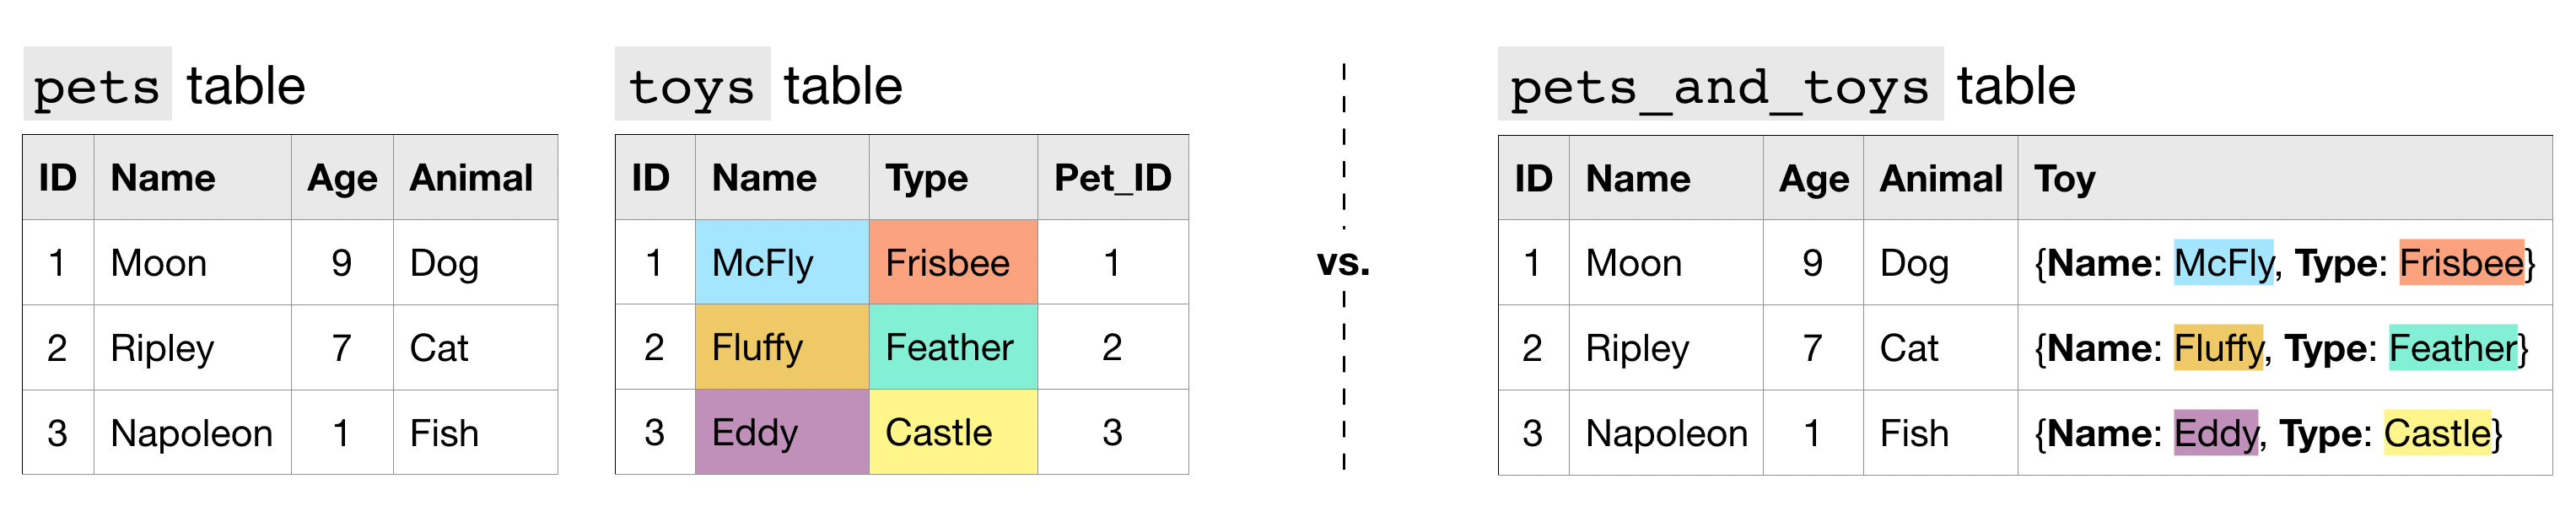

In questo caso, tutte le informazioni della tabella dei giocattoli vengono compresse in un'unica colonna (la colonna "pet" nella tabella `pets_and_toys`). Ci riferiamo alla colonna "pet" nella tabella `pets_and_toys` come a una colonna nidificata e diciamo che i campi "Nome" e "Tipo" sono nidificati al suo interno.

Le colonne nidificate hanno il tipo `STRUCT` (o il tipo `RECORD`). Ciò si riflette nello schema della tabella seguente.

Ricordiamo che ci riferiamo alla struttura di una tabella come al suo schema. Se hai bisogno di rivedere come interpretare lo schema delle tabelle, sentiti libero di dare un'occhiata a questa lezione dal micro-corso Intro to SQL.

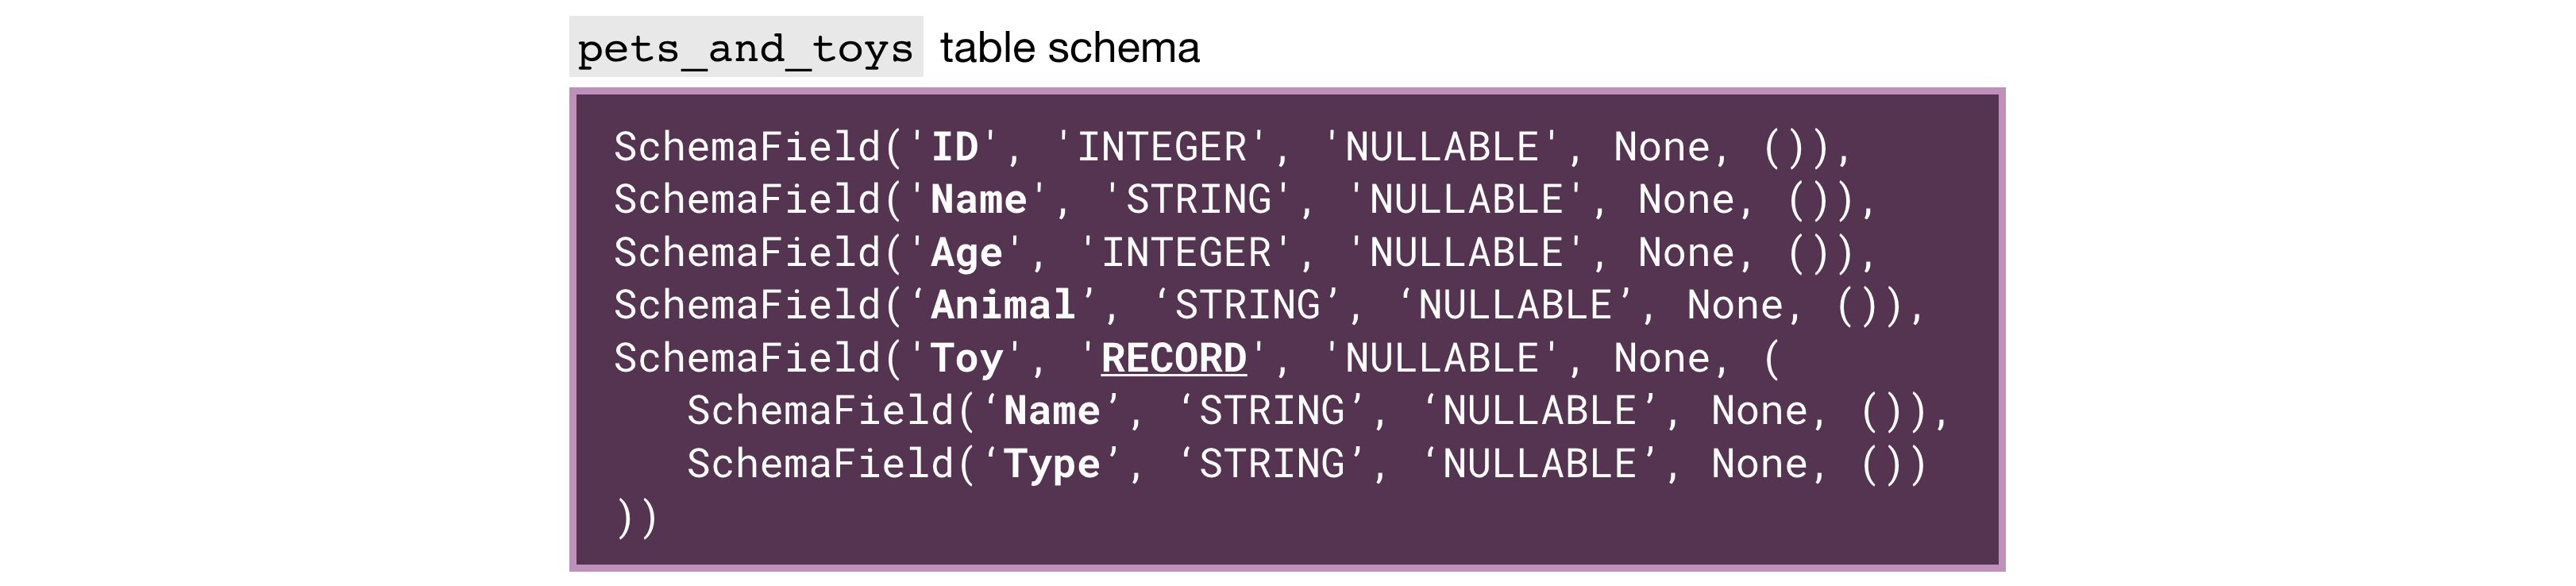

Per interrogare una colonna con dati nidificati, dobbiamo identificare ogni campo nel contesto della colonna che lo contiene:

- `Toy.Name` si riferisce al campo "Nome" nella colonna "pet" e
- `Toy.Type` si riferisce al campo "Tipo" nella colonna "pet".

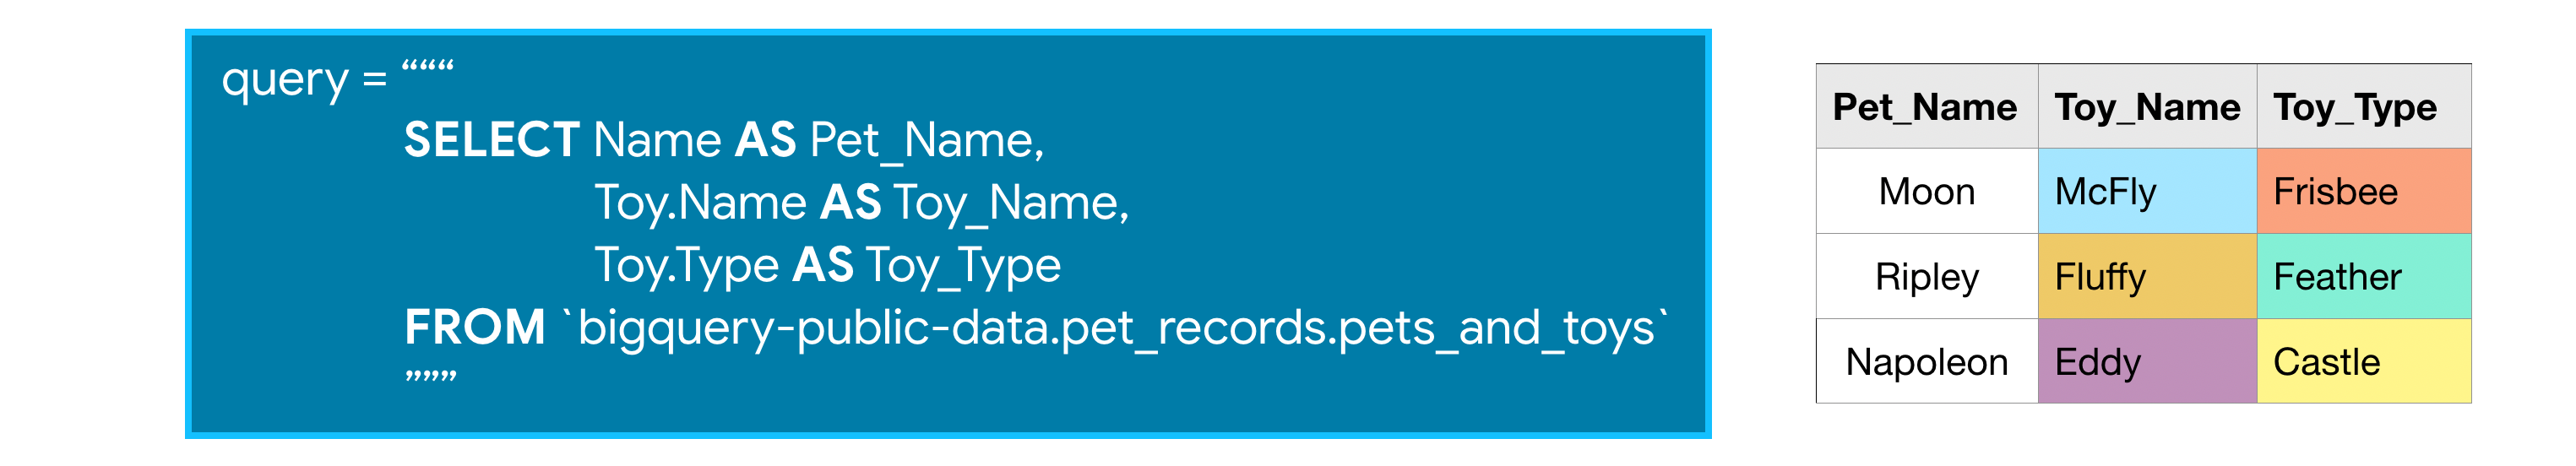

In caso contrario, le nostre regole abituali rimangono le stesse: non è necessario modificare nient'altro sulle nostre domande.

## Repeated Data
Consideriamo ora il caso (più realistico!) in cui ogni animale domestico può avere più giocattoli. In questo caso, per comprimere queste informazioni in un'unica tabella, dobbiamo sfruttare un tipo di dati diverso.

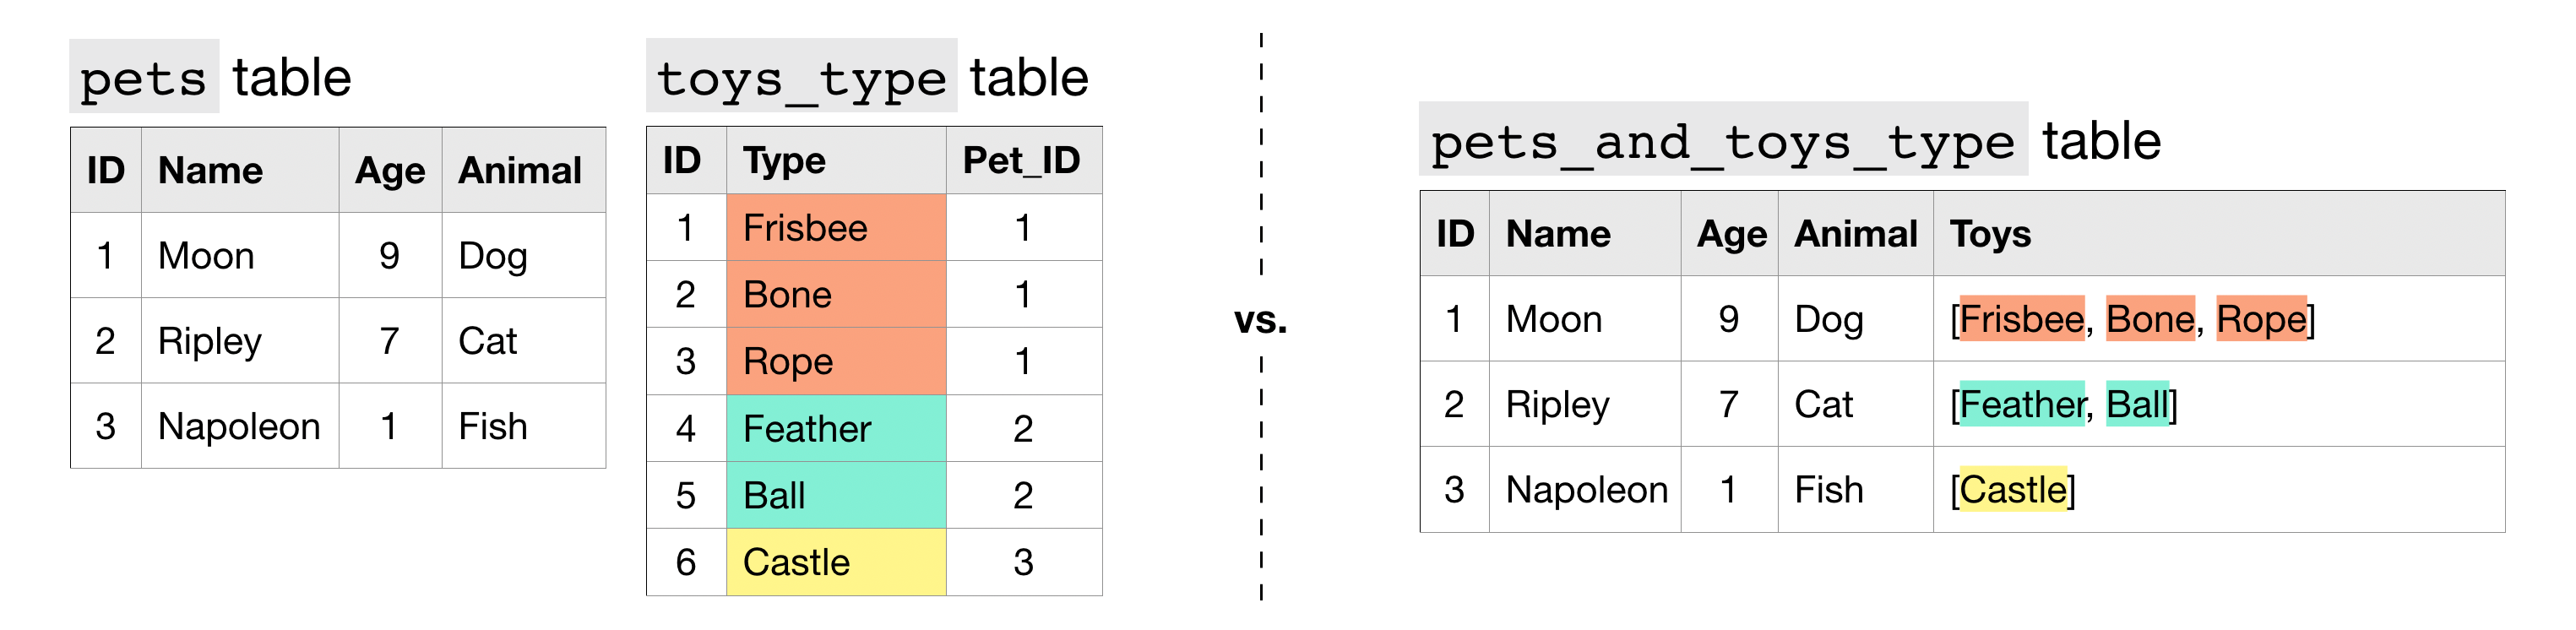

Diciamo che la colonna "pet" contiene dati ripetuti, perché consente più di un valore per ogni riga. Ciò si riflette nello schema della tabella seguente, dove la modalità della colonna "pet" appare come "`REPEATED`".

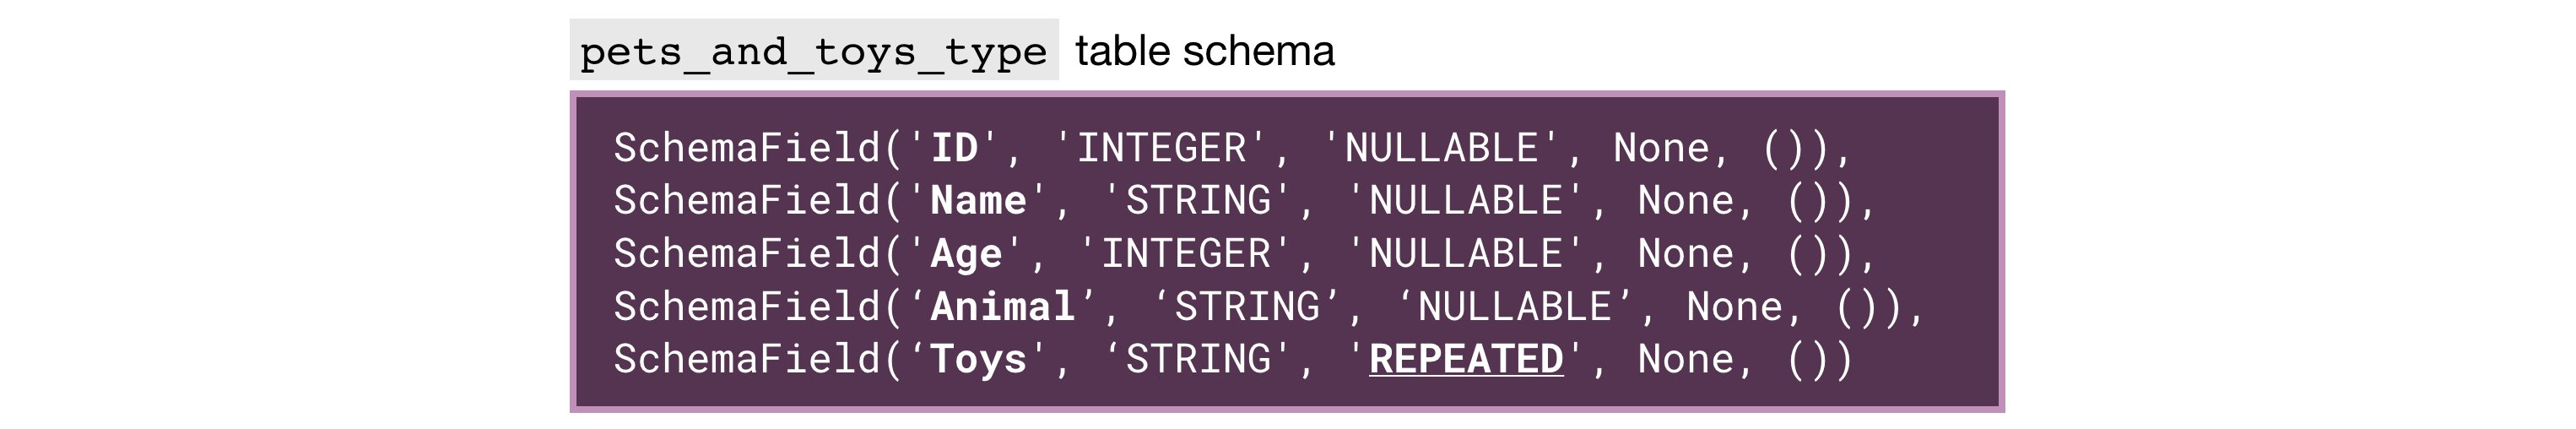

Ogni voce in un campo ripetuto è un `ARRAY` o un elenco ordinato di (zero o più) valori con lo stesso tipo di dati. Ad esempio, la voce nella colonna "pet" per Moon the Dog è [Frisbee, Bone, Rope], che è un `ARRAY` con tre valori.

Quando si interrogano dati ripetuti, è necessario inserire il nome della colonna contenente i dati ripetuti all'interno di una funzione `UNNEST()`

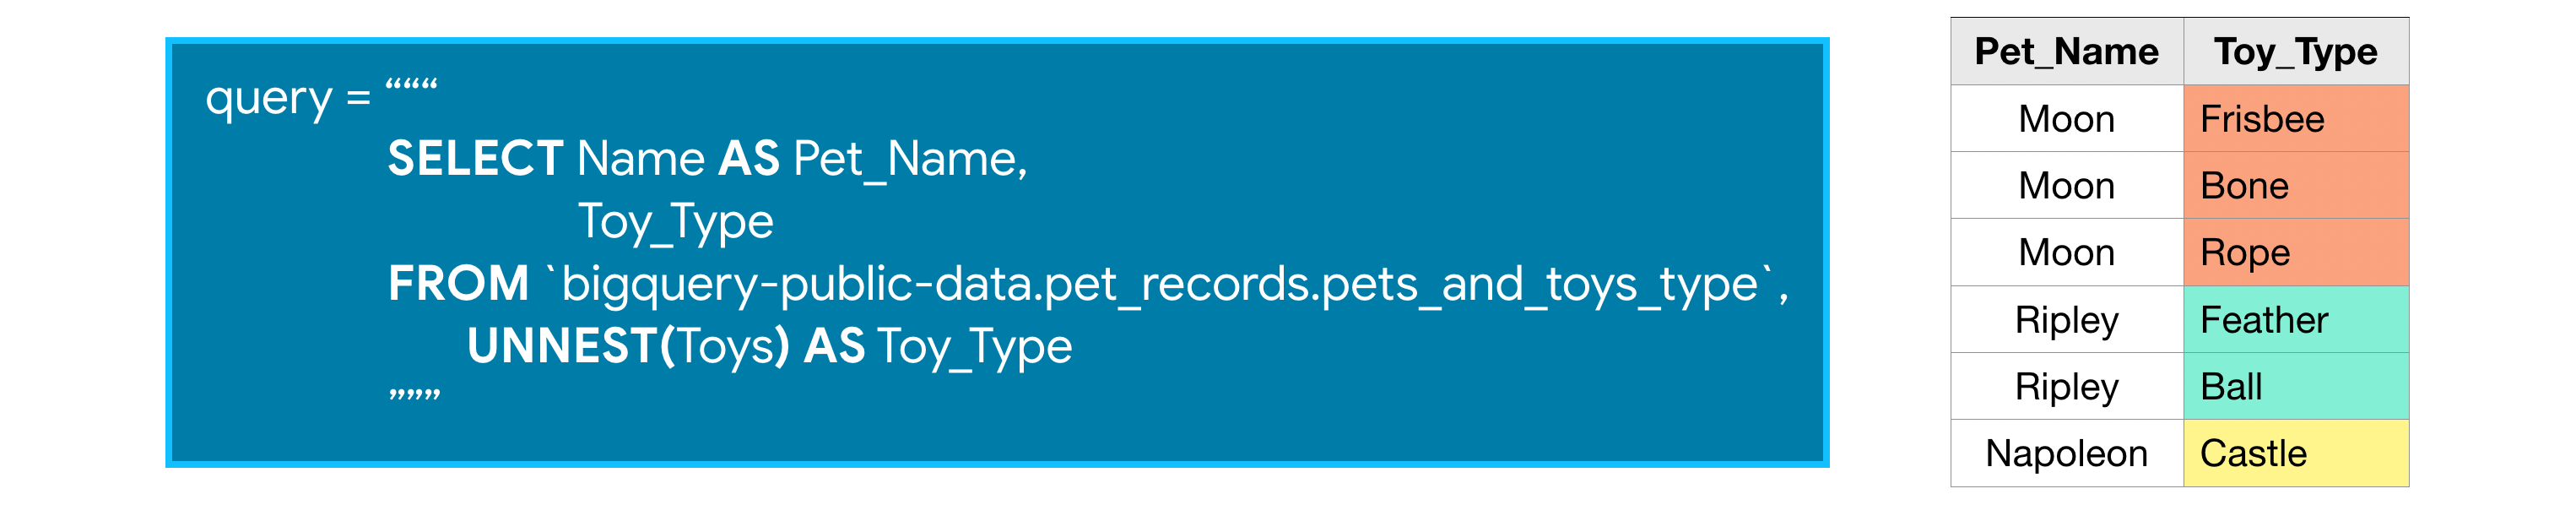

Questo essenzialmente appiattisce i dati ripetuti (che vengono quindi aggiunti al lato destro della tabella) in modo da avere un elemento su ogni riga. Per un'illustrazione di questo, controlla l'immagine qui sotto.

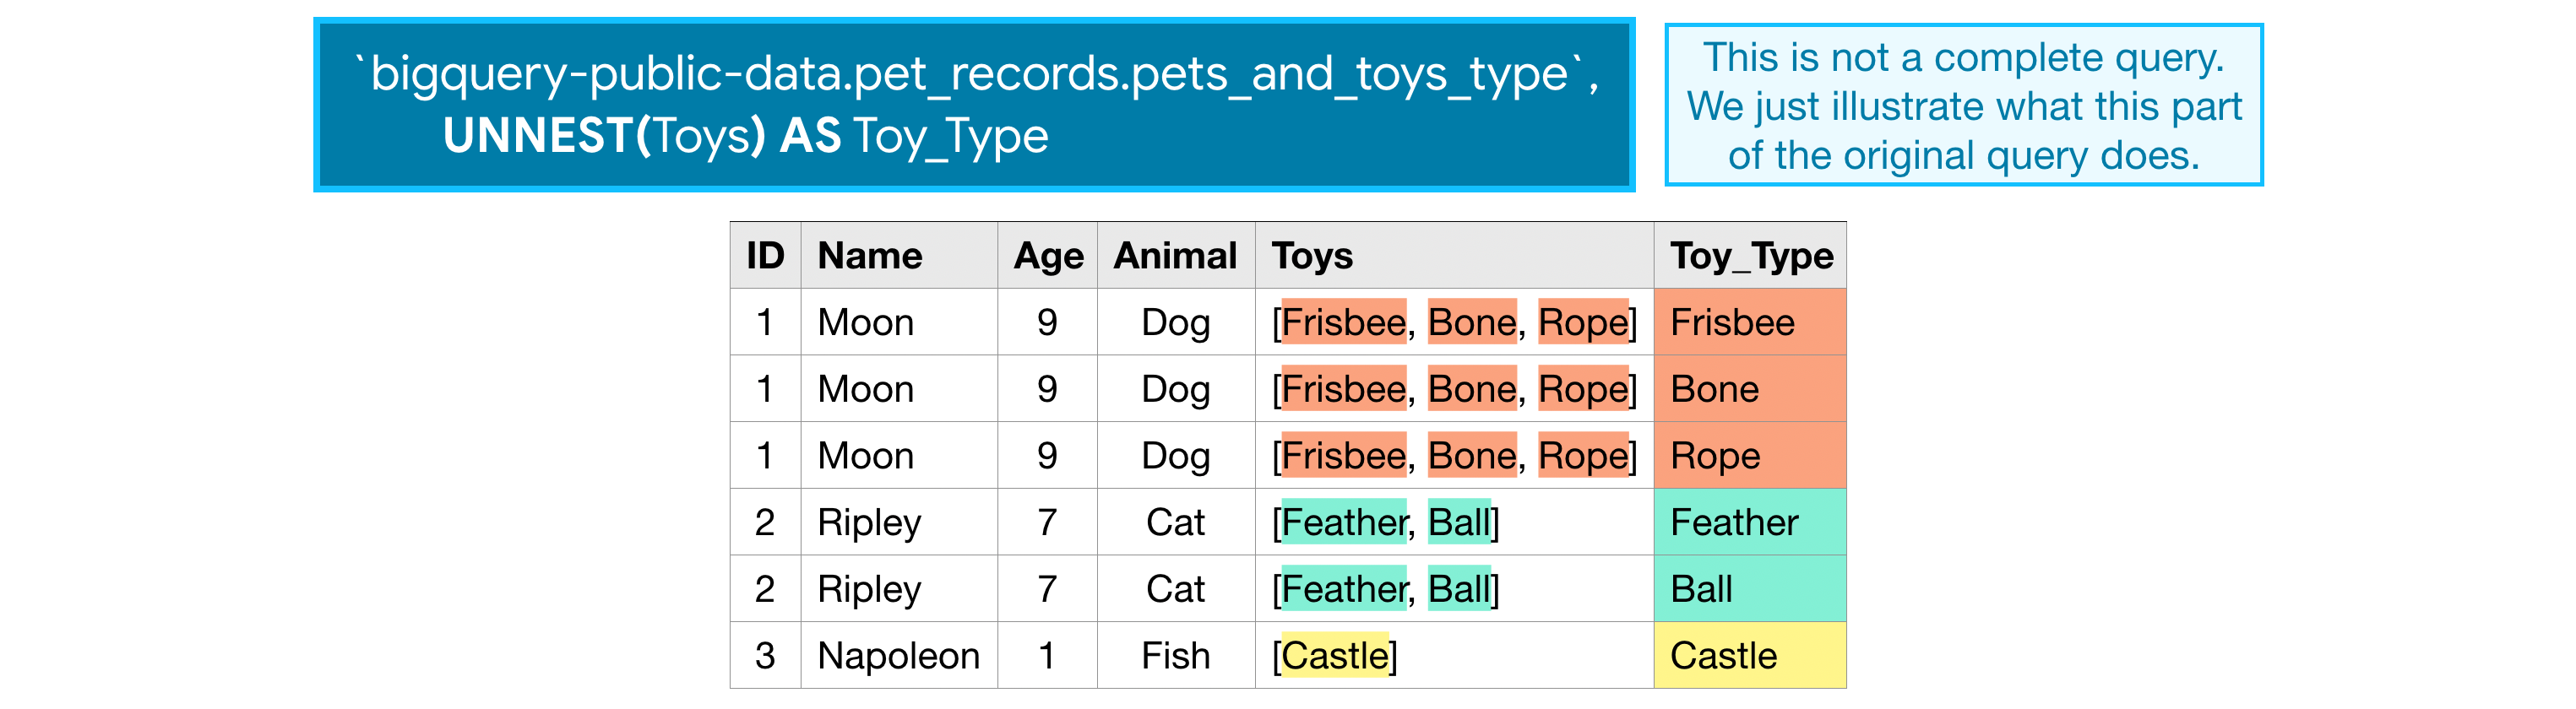

## Nested and repeated data
Ora, cosa succede se gli animali domestici possono avere più giocattoli e vorremmo tenere traccia sia del nome che del tipo di ciascun giocattolo? In questo caso, possiamo rendere la colonna "pet" sia **annidata** che **ripetuta**.

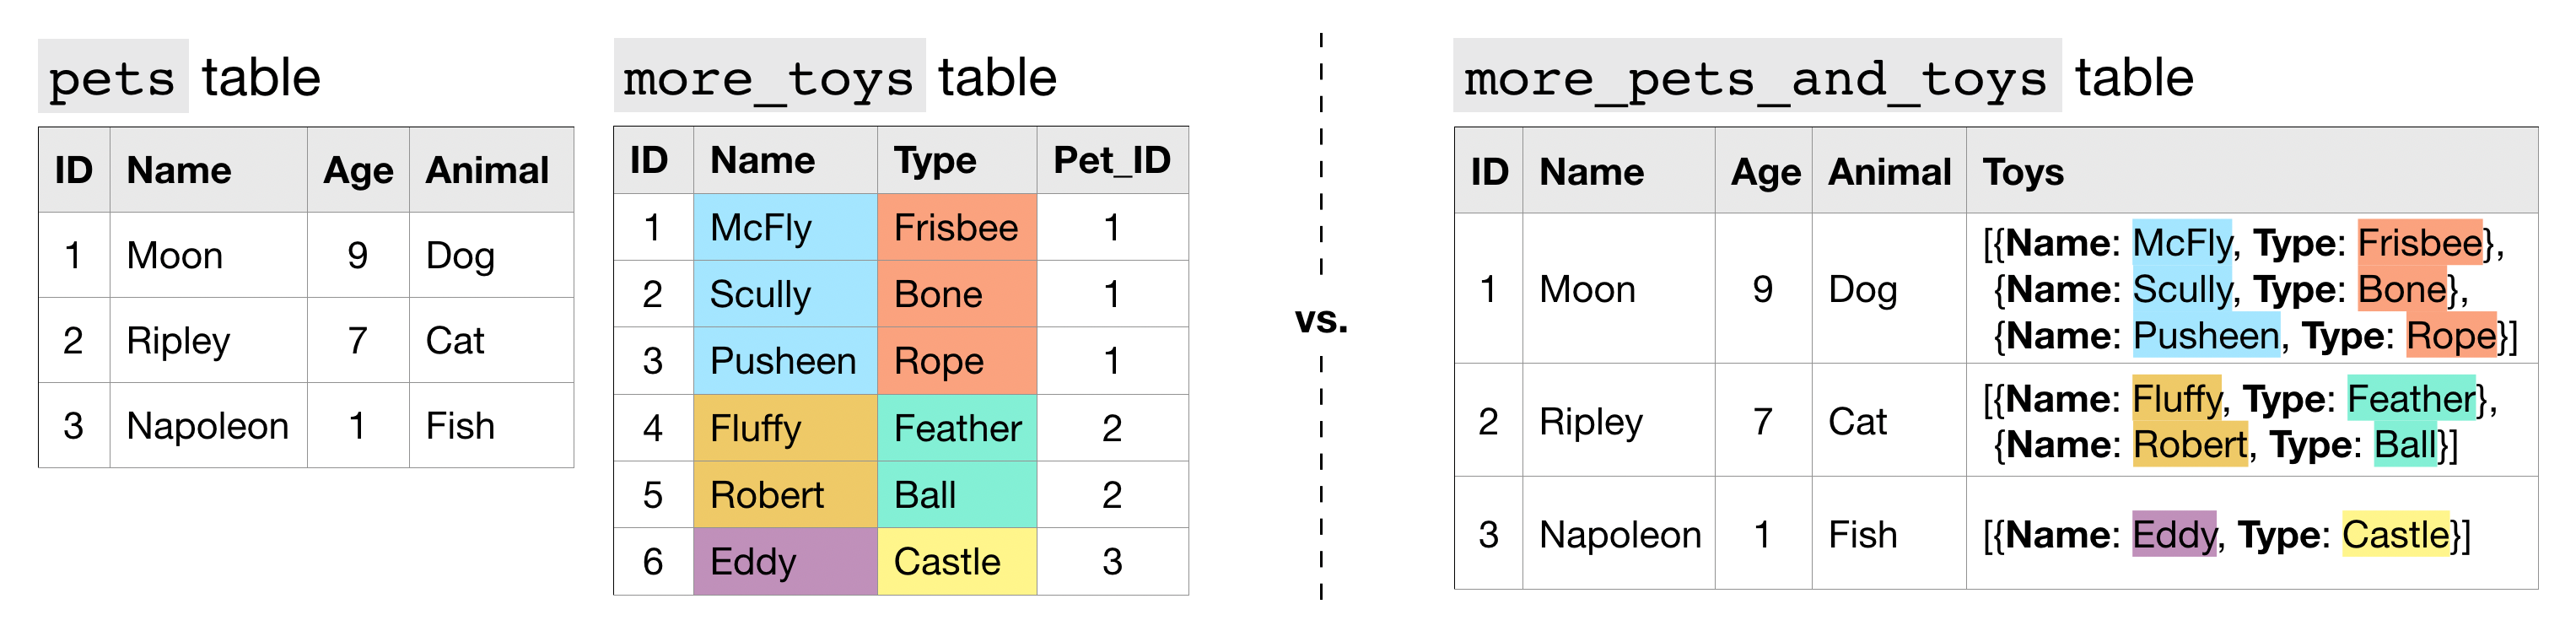

Nella tabella `more_pets_and_toys` sopra, "`Nome`" e "`Type`" sono entrambi i campi contenuti nella `STRUCT` "pet" e ogni voce in "`Toys.Name`" e "`Toys.Type`" è un `ARRAY`.

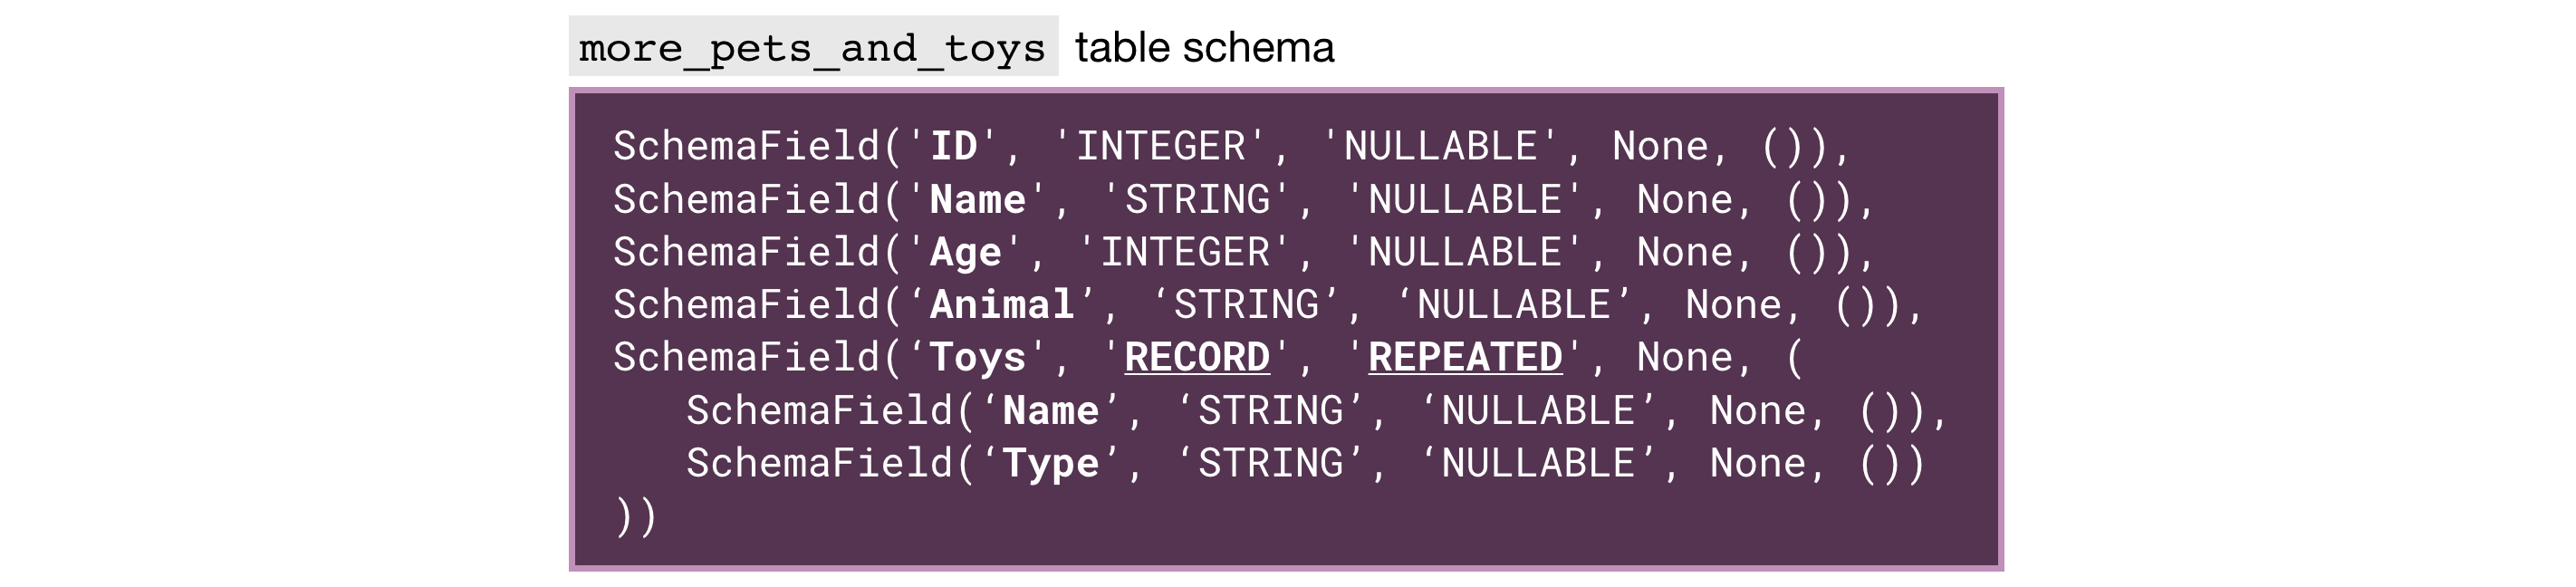

Diamo un'occhiata a una query di esempio.

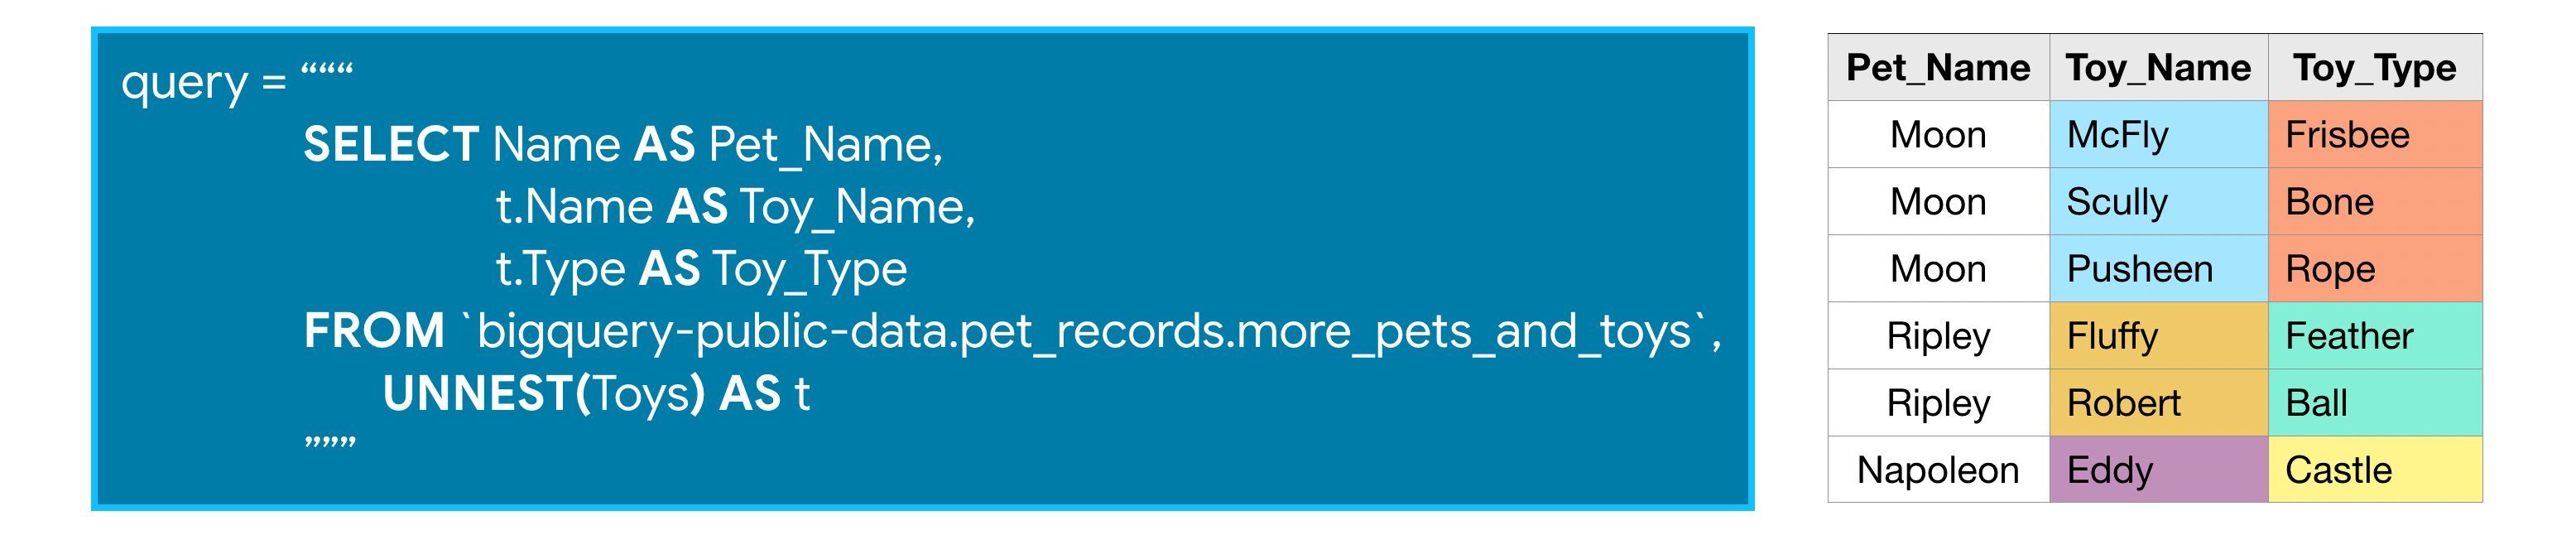

Poiché la colonna "Giocattoli" viene ripetuta, la appiattiamo con la funzione `UNNEST()`. E, poiché diamo alla colonna appiattita un alias di t, possiamo fare riferimento ai campi "`Nome`" e "`Tipo`" nella colonna "pet" rispettivamente come t.Nome e t.Tipo.

Per rafforzare ciò che hai imparato, applicheremo queste idee a un set di dati reale nella sezione seguente.

### Esempio
Lavoreremo con il set di dati di esempio di Google Analytics. Contiene informazioni che tracciano il comportamento dei visitatori del negozio Google Merchandise, un sito di e-commerce che vende articoli a marchio Google.

Iniziamo stampando le prime righe della tabella ga_sessions_20170801. (Abbiamo nascosto il codice corrispondente. Per dare un'occhiata, fai clic sul pulsante "Codice" in basso.) Questa tabella tiene traccia delle visite al sito Web il 1 agosto 2017.

In [1]:
from google.cloud import bigquery

# chiave mia
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="D:/Users/Alessio/sql-kaggle-355310-de53f901ac8a.json"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "google_analytics_sample" dataset
dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")

# Construct a reference to the "ga_sessions_20170801" table
table_ref = dataset_ref.table("ga_sessions_20170801")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2248281639583218707,None,None,Organic Search,Not Socially Engaged
1,<NA>,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8647436381089107732,None,None,Organic Search,Not Socially Engaged
2,<NA>,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2055839700856389632,None,None,Organic Search,Not Socially Engaged
3,<NA>,1,1501573386,1501573386,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",0750846065342433129,None,None,Direct,Not Socially Engaged
4,<NA>,8,1501651467,1501651467,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",0573427169410921198,None,None,Organic Search,Not Socially Engaged


Per una descrizione di ciascun campo, fare riferimento a questo dizionario di dati.

La tabella ha molti campi nidificati, che puoi verificare guardando il dizionario dei dati (suggerimento: cerca l'aspetto di 'RECORD' nella pagina) o l'anteprima della tabella sopra.

Nella nostra prima query su questa tabella, lavoreremo con le colonne "totali" e "dispositivo".

In [2]:
print("SCHEMA field for the 'totals' column:\n")
print(table.schema[5])

print("\nSCHEMA field for the 'device' column:\n")
print(table.schema[7])

SCHEMA field for the 'totals' column:

SchemaField('totals', 'RECORD', 'NULLABLE', None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('timeOnScreen', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('totalTransactionRevenue', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('sessionQualityDim', 'INTEGER', 'NULLABLE', None, (), None)), None)

SCHEMA field for th

Ci riferiamo al campo "browser" (che è nidificato nella colonna "dispositivo") e al campo "transazioni" (che è nidificato all'interno della colonna "totali") come `device.browser` e `totals.transactions` nella query seguente:

In [3]:
# Query to count the number of transactions per browser
query = """
        SELECT device.browser AS device_browser,
            SUM(totals.transactions) as total_transactions
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
        GROUP BY device_browser
        ORDER BY total_transactions DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

,device_browser,total_transactions
0,Chrome,41
1,Safari,3
2,Firefox,1
3,Internet Explorer,<NA>
4,UC Browser,<NA>


Memorizzando le informazioni nelle colonne "dispositivo" e "totali" come `STRUCT` (al contrario di tabelle separate), evitiamo `JOIN` costosi. Ciò aumenta le prestazioni e ci impedisce di doverci preoccupare delle chiavi `JOIN` (e di quali tabelle hanno i dati esatti di cui abbiamo bisogno).

Ora lavoreremo con la colonna "`hit`" come esempio di dati nidificati e ripetuti. Da:

- "`hits`" è una `STRUCT` (contiene dati nidificati) e viene ripetuto,
- "`hitNumber`", "`page`" e "`type`" sono tutti nidificati all'interno della colonna "`hits`" e
- "`pagePath`" è nidificato all'interno del campo "`page`",

possiamo interrogare questi campi con la seguente sintassi:

In [4]:
# Query to determine most popular landing point on the website
query = """
        SELECT hits.page.pagePath as path,
            COUNT(hits.page.pagePath) as counts
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
            UNNEST(hits) as hits
        WHERE hits.type="PAGE" and hits.hitNumber=1
        GROUP BY path
        ORDER BY counts DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

,path,counts
0,/home,1257
1,/google+redesign/shop+by+brand/youtube,587
2,/google+redesign/apparel/mens/mens+t+shirts,117
3,/signin.html,78
4,/basket.html,35


In questo caso, la maggior parte degli utenti atterra sul sito tramite la pagina "`/home`".

## Esercizi
Ora che sai come eseguire query sui dati nidificati e ripetuti, sei pronto per trarre informazioni interessanti dal set di dati GitHub Repos.

Prima di iniziare, esegui la cella seguente per impostare tutto.

In [5]:
# Set up feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.sql_advanced.ex3 import *
print("Setup Complete")

Setup Complete


### Domanda 1
**Chi ha avuto più impegni nel 2016?**

GitHub è il luogo più popolare per collaborare a progetti software. Un **repository** (o repository) di GitHub è una raccolta di file associati a un progetto specifico e un **commit** di GitHub è una modifica apportata da un utente a un repository. Ci riferiamo all'utente come un **committente**.

La tabella `sample_commits` contiene un piccolo campione di commit GitHub, dove ogni riga corrisponde a commit diversi. La cella di codice seguente recupera la tabella e mostra le prime cinque righe di questa tabella.

In [6]:
from google.cloud import bigquery

# chiave mia
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="D:/Users/Alessio/sql-kaggle-355310-de53f901ac8a.json"

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "sample_commits" table
table_ref = dataset_ref.table("sample_commits")

# API request - fetch the table
sample_commits_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(sample_commits_table, max_results=5).to_dataframe()

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,3eca86e75ec7a7d4b9a9c8091b11676f7bd2a39f,8e1b4380409a85a922ee0d3f622b5dd4d16bcfad,[104a0c02e8b1936c049e18a6d4e4ab040fb61213],"{'name': 'Mark Rutland', 'email': '1db9dd262be...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: Remove fixmap include fragility,arm64: Remove fixmap include fragility\n\nThe ...,"[{'key': 'Signed-off-by', 'value': 'Mark Rutla...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
1,7158627686f02319c50c8d9d78f75d4c8d126ff2,3b4d781bd966f07cad1b67b137f0ff8b89430e9a,[66aa8d6a145b6a66566b4fce219cc56c3d0e01c3],"{'name': 'Will Deacon', 'email': 'b913f13ef92a...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: percpu: implement optimised pcpu access...,arm64: percpu: implement optimised pcpu access...,"[{'key': 'Signed-off-by', 'value': 'Will Deaco...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
2,9732cafd9dc0206479be919baf0067239f0a63ca,c8878035ac9cb6dce592957f12dc1723a583989d,[f3c003f72dfb2497056bcbb864885837a1968ed5],"{'name': 'Jiang Liu', 'email': 'c745fa7b96fe79...","{'name': 'Catalin Marinas', 'email': '15ce75b2...","arm64, jump label: optimize jump label impleme...","arm64, jump label: optimize jump label impleme...","[{'key': 'Reviewed-by', 'value': 'Will Deacon ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
3,4702abd3f9728893ad5b0f4389e1902588510459,32926e7c55ef585d9b9c174a0e5f9ed13ed6bf7e,[ddf28352b80c86754a6424e3a61e8bdf9213b3c7],"{'name': 'Nicolas Pitre', 'email': '408789a210...","{'name': 'Arnd Bergmann', 'email': 'f2c659f019...",ARM: mach-nuc93x: delete,ARM: mach-nuc93x: delete\n\nThis architecture ...,"[{'key': 'Signed-off-by', 'value': 'Nicolas Pi...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
4,57bd4b91a6cfc5bad4c5d829ef85293ea63643ea,2ffc2066eb7638e185663e9d849663403229d4e5,[f74c95c20bad8e183e41283475f68a3e7b247af4],"{'name': 'Ben Dooks', 'email': '1177f64998f284...","{'name': 'Ben Dooks', 'email': '1177f64998f284...",[ARM] S3C24XX: Movev udc headers to arch/arm/p...,[ARM] S3C24XX: Movev udc headers to arch/arm/p...,"[{'key': 'Signed-off-by', 'value': 'Ben Dooks ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None


Eseguire la cella di codice successiva per stampare lo schema della tabella.

In [7]:
# Print information on all the columns in the table
sample_commits_table.schema

[SchemaField('commit', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('tree', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('parent', 'STRING', 'REPEATED', None, (), None),
 SchemaField('author', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None)), None),
 SchemaField('committer', 'RECORD', 'NULLABLE', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None)), None),
 SchemaField('subject', 'STRING', 'NULLABLE', None, (), None),
 SchemaFie

Scrivi una query per trovare le persone con il maggior numero di commit in questa tabella nel 2016. La tua query dovrebbe restituire una tabella con due colonne:
- `committer_name` - contiene il nome di ogni individuo con un commit (dal 2016) nella tabella
- `num_commits` - mostra il numero di commit che l'individuo ha nella tabella (dal 2016)

Ordina la tabella, in modo che le persone con più commit vengano visualizzate per prime.

**NOTA**: puoi trovare il nome di ogni committer e la data del commit nella colonna "committer", rispettivamente nei campi figlio "name" e "date".

In [8]:
# Write a query to find the answer
max_commits_query = """
                    SELECT committer.name AS committer_name, COUNT(*) AS num_commits
                    FROM `bigquery-public-data.github_repos.sample_commits`
                    WHERE committer.date >= '2016-01-01' AND committer.date < '2017-01-01'
                    GROUP BY committer_name
                    ORDER BY num_commits DESC
                    """

# Check your answer
q_1.check()

,committer_name,num_commits
0,Greg Kroah-Hartman,3545
1,David S. Miller,3120
2,TensorFlower Gardener,2449
3,Linus Torvalds,2424
4,Benjamin Pasero,1127


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 2
**Guarda le lingue!**

Ora lavorerai con la tabella `languages`. Esegui la cella di codice qui sotto per stampare le prime righe.

In [9]:
# Construct a reference to the "languages" table
table_ref = dataset_ref.table("languages")

# API request - fetch the table
languages_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(languages_table, max_results=5).to_dataframe()

,repo_name,language
0,kroki/seqlock,"[{'name': 'C', 'bytes': 7673}]"
1,andreasfrom/array_list,"[{'name': 'C', 'bytes': 8770}]"
2,fruitnuke/exercises,"[{'name': 'C', 'bytes': 16261}]"
3,you21979/libmti,"[{'name': 'C', 'bytes': 13087}]"
4,shakilahmmeed/Wallet-Manager,"[{'name': 'C', 'bytes': 8816}]"


Ogni riga della tabella `languages` corrisponde a un repository diverso.
- La colonna "repo_name" contiene il nome del repository,
- il campo "nome" nella colonna "lingua" contiene i linguaggi di programmazione che si possono trovare nel repository, e
- il campo "byte" nella colonna "lingua" ha la dimensione dei file (in byte, per la lingua corrispondente).

Eseguire la cella di codice seguente per stampare lo schema della tabella.

In [10]:
# Print information on all the columns in the table
languages_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, (SchemaField('name', 'STRING', 'NULLABLE', None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, (), None)), None)]

Supponiamo per il momento di avere accesso a una tabella chiamata `sample_languages` che contiene solo un piccolissimo sottoinsieme delle righe della tabella `languages`: contiene infatti solo tre righe! Questa tabella è rappresentata nell'immagine sottostante.

![](https://i.imgur.com/qAb5lZ2.png)

Quante righe ci sono nella tabella restituita dalla query seguente?

![](https://i.imgur.com/Q5qYAtz.png)

Inserisci la tua risposta nella cella del codice successiva.

In [11]:
# Fill in the blank
num_rows = 6

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 3
***Qual è il linguaggio di programmazione più popolare?**

Scrivi una query per sfruttare le informazioni nella tabella `languages` per determinare quali linguaggi di programmazione appaiono nella maggior parte dei repository. La tabella restituita dalla tua query dovrebbe avere due colonne:
- `language_name` - il nome del linguaggio di programmazione
- `num_repos` - il numero di repository nella tabella `languages` che usano il linguaggio di programmazione

Ordina la tabella in modo che le lingue che appaiono in più repository vengano mostrate per prime.

In [12]:
# Write a query to find the answer
pop_lang_query = """
                 SELECT l.name as language_name, COUNT(*) as num_repos
                 FROM `bigquery-public-data.github_repos.languages`,
                     UNNEST(language) AS l
                 GROUP BY language_name
                 ORDER BY num_repos DESC
                 """

# Check your answer
q_3.check()

,language_name,num_repos
0,JavaScript,1099807
1,CSS,808900
2,HTML,777597
3,Shell,639719
4,Python,549937


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 4
**Quali lingue sono utilizzate nel repository con il maggior numero di lingue?**

Per questa domanda, limiterai la tua attenzione al repository con nome `'polyrabbit/polyglot'`.

Scrivere una query che restituisca una tabella con una riga per ogni lingua in questo repository. La tabella dovrebbe avere due colonne:
- `name` - il nome del linguaggio di programmazione
- `bytes` - il numero totale di byte di quel linguaggio di programmazione

Ordina la tabella in base alla colonna "byte" in modo che i linguaggi di programmazione che occupano più spazio nel repository vengano visualizzati per primi.

In [13]:
# Your code here
all_langs_query = """
                  SELECT l.name, l.bytes
                  FROM `bigquery-public-data.github_repos.languages`,
                      UNNEST(language) as l
                  WHERE repo_name = 'polyrabbit/polyglot'
                  ORDER BY l.bytes DESC
                  """

# Check your answer
q_4.check()

,name,bytes
0,Lasso,834726
1,C,819142
2,Mercury,709952
3,Objective-C,495392
4,Game Maker Language,298131


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>